In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [59]:
datadir = os.path.join(os.path.realpath(''),'cached')
datadir = os.path.join(datadir,'Aggreegated.csv')
df = pd.read_csv(datadir)

In [60]:
df.columns
df.index

RangeIndex(start=0, stop=39572, step=1)

In [61]:
df = df[df["success"] == True]

In [62]:
df.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1577624147359,8,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,217,134,1,1,http://127.0.0.1:8000/cached/?Cluster=27.0,8,0,1
1,1577624147372,6,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,217,134,1,1,http://127.0.0.1:8000/cached/?Cluster=27.0,6,0,1
2,1577624147379,4,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,217,134,1,1,http://127.0.0.1:8000/cached/?Cluster=27.0,4,0,0
3,1577624147858,5,HTTP Request,200,OK,Thread Group 1-2,text,True,NaN,217,134,2,2,http://127.0.0.1:8000/cached/?Cluster=27.0,5,0,0
4,1577624147865,5,HTTP Request,200,OK,Thread Group 1-2,text,True,NaN,217,134,2,2,http://127.0.0.1:8000/cached/?Cluster=27.0,5,0,0


In [63]:
df.describe()

,timeStamp,elapsed,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,3.927200e+04,39272.000000,0.0,39272.00000,39272.0,39272.000000,39272.000000,39272.000000,39272.0,39272.000000
mean,1.577624e+12,748.339147,NaN,1323.34396,134.0,91.326288,91.326288,748.280760,0.0,0.467840
std,2.274735e+05,1288.116154,NaN,1608.54713,0.0,19.083119,19.083119,1288.116449,0.0,0.512117
min,1.577624e+12,4.000000,NaN,217.00000,134.0,1.000000,1.000000,4.000000,0.0,0.000000
25%,1.577624e+12,15.000000,NaN,217.00000,134.0,99.000000,99.000000,14.000000,0.0,0.000000
50%,1.577625e+12,18.000000,NaN,217.00000,134.0,100.000000,100.000000,18.000000,0.0,0.000000
75%,1.577625e+12,29.000000,NaN,3662.00000,134.0,100.000000,100.000000,29.000000,0.0,1.000000
max,1.577625e+12,3079.000000,NaN,3662.00000,134.0,100.000000,100.000000,3079.000000,0.0,14.000000


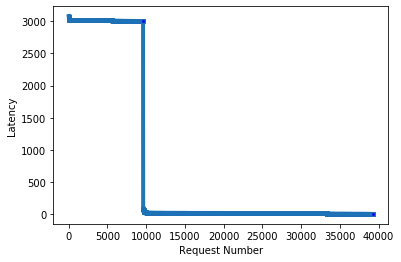

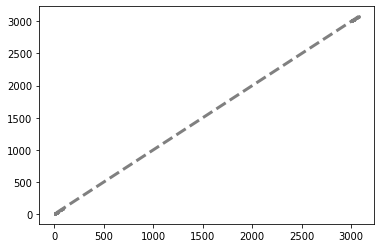

In [65]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.plot(range(0,39272),'Latency', data=df, marker='o', markerfacecolor='blue', markersize=4, linewidth=4)
plt.show()
df.sort_values(by='Latency',inplace=True, ascending=False)
plt.plot('Latency','Latency', data=df, marker='o', markerfacecolor='grey', markersize=1, color='grey', linewidth=3,linestyle='dashed')

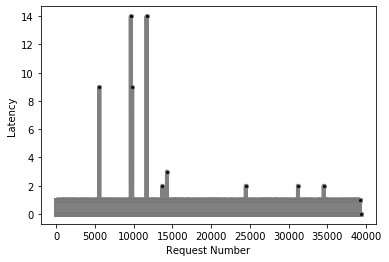

In [83]:
#ConnectTime
plt.xlabel('Request Number')
plt.ylabel('Latency')
#df.sort_values(by='Connect',inplace=True)
plt.plot(range(0,39272),'Connect', data=df, marker='o', markerfacecolor='black', markersize=4, color='grey', linewidth=4)

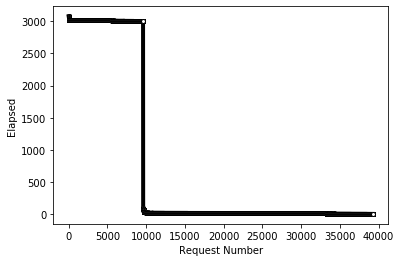

In [68]:
#Elapsed
#Elapsed = RequestTime+ResponseTime
plt.xlabel('Request Number')
plt.ylabel('Elapsed')
plt.plot( range(0,39272),'elapsed', data=df, marker='o', markerfacecolor='white', markersize=4, color='black', linewidth=4)

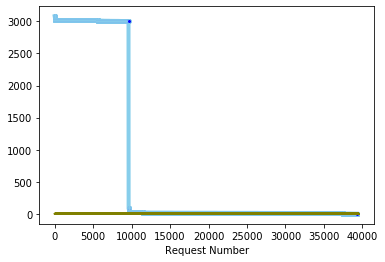

In [71]:
#Connection Time and Latency
plt.xlabel('Request Number')
plt.plot(range(0,39272),'Latency', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.plot( 'Connect', '', data=df,  marker='', color='olive', linewidth=2)
#plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)

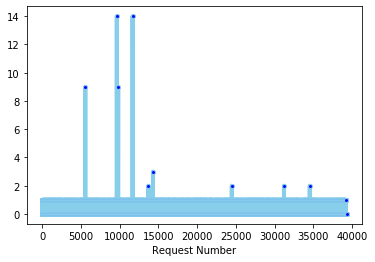

In [77]:
#Connection Time and Latency
plt.xlabel('Request Number')
plt.plot(range(0,39272),'Connect', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
#plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)
#plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)

In [78]:
print(type(df['Latency'][0]))
print(type(df['Connect'][0]))
df['LatencyConnect'] = df['elapsed'] - df['Connect']

<class 'numpy.int64'>
<class 'numpy.int64'>


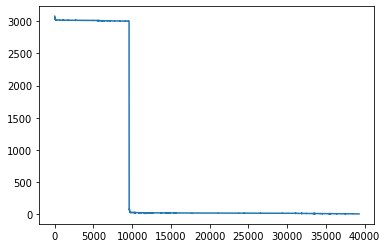

In [82]:
plt.plot(range(0,39272),'LatencyConnect', data=df)